In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sqlalchemy import create_engine

In [2]:
csv_file = "./Resources/googleplaystore.csv"
df = pd.read_csv(csv_file)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
new_df = df[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].copy()
new_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone


In [4]:
new_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Content Rating     object
dtype: object

### Reviews

In [5]:
new_df.Reviews.isna().sum()

0

In [6]:
new_df[new_df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,NaN


In [7]:
new_df.drop(new_df.index[10472],inplace=True)

In [8]:
new_df['Reviews']=new_df['Reviews'].astype(int)

### Type

In [9]:
new_df.Type.value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [10]:
new_df.Type.isna().sum()

1

In [11]:
new_df['Type'].fillna('Free',inplace=True)

In [12]:
new_df.Type.isna().sum()

0

### Content Rating

In [13]:
 new_df['Content Rating'].value_counts() 

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### Size

In [14]:
new_df.loc[new_df['Size'].str.contains('k'), 'Size'] = '.5M'
new_df.loc[new_df['Size'].str.contains('Varies with device'), 'Size'] = '31M'
new_df['Size'] = new_df['Size'].map(lambda x: x.rstrip('M'))

In [15]:
new_df.Size.value_counts()

31      1765
.5       316
11       198
12       196
14       194
13       191
15       184
17       160
19       154
16       149
26       149
25       143
20       139
21       138
24       136
10       136
18       133
23       117
22       114
29       103
27        97
28        95
30        84
33        79
3.3       77
37        76
35        72
2.9       69
2.5       68
2.3       68
        ... 
72        19
95        18
68        18
94        17
85        17
98        16
100       16
66        16
93        16
9.6       15
64        15
83        15
92        15
73        15
9.3       15
88        14
71        14
77        13
80        13
87        13
75        13
79        11
81        11
10.0      10
65        10
84         9
89         9
86         8
1.0        7
90         6
Name: Size, Length: 183, dtype: int64

### Installs

In [16]:
new_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [17]:
#remove + from installs
new_df['Installs'] = new_df['Installs'].map(lambda x: x.rstrip('+'))

#remove commas from installs
new_df['Installs']  = new_df['Installs'] .str.replace(',', '')


In [18]:
new_df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

### Rating

In [19]:
new_df['Rating'].value_counts() 

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

### Analysis

In [20]:
def univariateAnalysis(featureName):
    mDB = pd.DataFrame({'Absolute_Frequency':featureName.value_counts()})    
    
    x = mDB.index.values
    
    y = mDB.Absolute_Frequency.values
    
    plt.figure(figsize=(8,8))
    
    
    BarplotDB=sns.barplot(x,y,palette="CMRmap")
    
    BarplotDB.set_xticklabels(BarplotDB.get_xticklabels(), rotation=90)


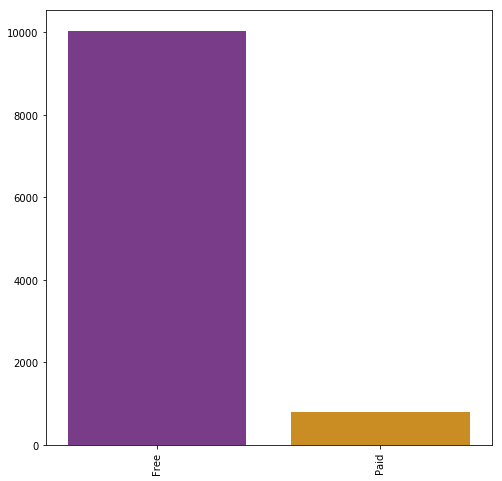

In [21]:
univariateAnalysis(new_df.Type)

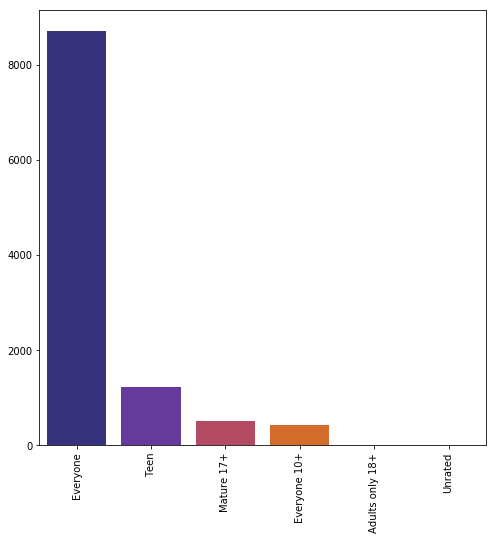

In [22]:
univariateAnalysis( new_df['Content Rating'])

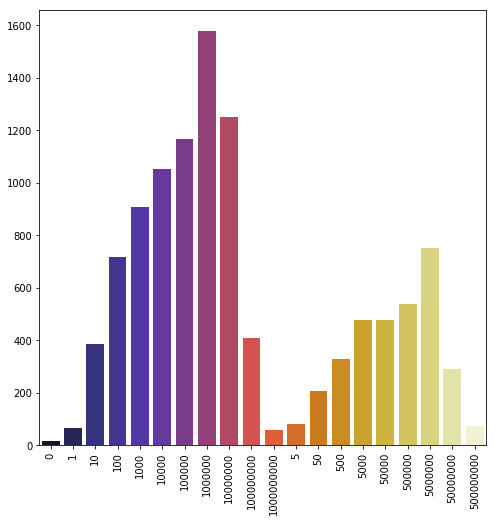

In [23]:
univariateAnalysis(new_df['Installs'])

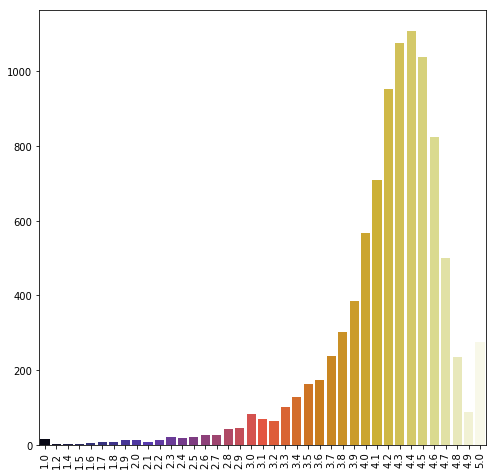

In [24]:
univariateAnalysis(new_df['Rating'])

# Load into Database

In [25]:
rds_connection_string = "postgres:Pawan06#@127.0.0.1/ETL_Project_DB"
engine = create_engine(f'postgres://{rds_connection_string}')

In [26]:
engine.table_names()

['google_playstore']

In [28]:
new_df.to_sql(name='google_playstore_analysis', con=engine, if_exists='append', index=False)

In [29]:
engine.table_names()

['google_playstore', 'google_playstore_analysis']

In [31]:
pd.read_sql_query('select * from google_playstore_analysis', con=engine).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,Everyone
